In [11]:
from linearmodels import PanelOLS
from statsmodels.iolib.summary2 import summary_col
import matplotlib.pyplot as plt
import pandas as pdzs
import numpy as np
import statsmodels.api as sm

In [12]:
df = pd.read_csv('processed_brain_more.csv')
df['MSA'].astype('str')
df['state'] = df['MSA'].apply(lambda x: x.split(',')[1].strip())
df['Year'] = df['Year'].astype(int)
df['const'] = 1

In [13]:
tdf = df.set_index(['MSA', 'Year'])

In [14]:
def pprint(results):
    for result in results:
        print(round(result.params.values[1], 4), round(result.std_errors.values[1], 4))

In [15]:
mod = sm.OLS(df['Crude Rate'], df[['const', 'min_dist', 'Sex', "Asian", 'Black']])
time = mod.fit(cov_type='HC1')
print(time.summary())

                            OLS Regression Results                            
Dep. Variable:             Crude Rate   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     1605.
Date:                Thu, 10 Dec 2020   Prob (F-statistic):               0.00
Time:                        01:04:07   Log-Likelihood:                -7178.2
No. Observations:                3926   AIC:                         1.437e+04
Df Residuals:                    3921   BIC:                         1.440e+04
Df Model:                           4                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.5854      0.040    189.195      0.0

In [16]:
# Time FE with controls
mod = PanelOLS(tdf['Crude Rate'], tdf[['const', 'min_dist', 'Sex', "Asian", 'Black']], entity_effects=False, time_effects=True)
time = mod.fit(cov_type='robust')
print(time)

                          PanelOLS Estimation Summary                           
Dep. Variable:             Crude Rate   R-squared:                        0.5428
Estimator:                   PanelOLS   R-squared (Between):              0.4576
No. Observations:                3926   R-squared (Within):               0.4614
Date:                Thu, Dec 10 2020   R-squared (Overall):              0.5368
Time:                        01:04:07   Log-likelihood                   -7136.0
Cov. Estimator:                Robust                                           
                                        F-statistic:                      1158.5
Entities:                         105   P-value                           0.0000
Avg Obs:                       37.390   Distribution:                  F(4,3903)
Min Obs:                       1.0000                                           
Max Obs:                       114.00   F-statistic (robust):             1640.6
                            

In [17]:
# print out dummies
year_str = df.reset_index()[['Year']].astype('str')
msa_str = df.reset_index()[['MSA']].astype('str')
year_str.index = tdf.index
msa_str.index = tdf.index
tdf['year_str'] = year_str
tdf['msa_str'] = msa_str
tdf['year_str'] = tdf['year_str'].astype('str')
tdf['msa_str'] = tdf['msa_str'].astype('str')

In [18]:
mod = PanelOLS(tdf['Crude Rate'], tdf[['const', 'min_dist', 'year_str']], entity_effects=False, time_effects=False, drop_absorbed=True)
entity = mod.fit(cov_type='robust')
print(entity)

                          PanelOLS Estimation Summary                           
Dep. Variable:             Crude Rate   R-squared:                        0.0168
Estimator:                   PanelOLS   R-squared (Between):             -0.0197
No. Observations:                3926   R-squared (Within):               0.0039
Date:                Thu, Dec 10 2020   R-squared (Overall):              0.0168
Time:                        01:04:07   Log-likelihood                   -8655.4
Cov. Estimator:                Robust                                           
                                        F-statistic:                      3.5225
Entities:                         105   P-value                           0.0000
Avg Obs:                       37.390   Distribution:                 F(19,3906)
Min Obs:                       1.0000                                           
Max Obs:                       114.00   F-statistic (robust):             4.2712
                            

In [19]:
# print out dummies
year_str = df.reset_index()[['Year']].astype('str')
state_str = df.reset_index()[['state']].astype('str')
sdf = df.set_index(['state', 'Year'])
year_str.index = sdf.index
state_str.index = sdf.index
sdf['year_str'] = year_str
sdf['state_str'] = state_str

In [20]:
# time FE
mod = PanelOLS(sdf['Crude Rate'], sdf[['const','min_dist', 'year_str']], entity_effects=False, time_effects=False)
entity = mod.fit(cov_type='robust')
print(entity)

                          PanelOLS Estimation Summary                           
Dep. Variable:             Crude Rate   R-squared:                        0.0168
Estimator:                   PanelOLS   R-squared (Between):              0.0225
No. Observations:                3926   R-squared (Within):              -0.0019
Date:                Thu, Dec 10 2020   R-squared (Overall):              0.0168
Time:                        01:04:07   Log-likelihood                   -8655.4
Cov. Estimator:                Robust                                           
                                        F-statistic:                      3.5225
Entities:                          38   P-value                           0.0000
Avg Obs:                       103.32   Distribution:                 F(19,3906)
Min Obs:                       6.0000                                           
Max Obs:                       476.00   F-statistic (robust):             4.2712
                            

In [21]:
# State FE
mod = PanelOLS(sdf['Crude Rate'], sdf[['const','min_dist', 'state_str']], entity_effects=False, time_effects=False)
entity = mod.fit(cov_type='robust')
print(entity)

                          PanelOLS Estimation Summary                           
Dep. Variable:             Crude Rate   R-squared:                        0.2062
Estimator:                   PanelOLS   R-squared (Between):              1.0000
No. Observations:                3926   R-squared (Within):               0.0086
Date:                Thu, Dec 10 2020   R-squared (Overall):              0.2062
Time:                        01:04:07   Log-likelihood                   -8235.4
Cov. Estimator:                Robust                                           
                                        F-statistic:                      26.576
Entities:                          38   P-value                           0.0000
Avg Obs:                       103.32   Distribution:                 F(38,3887)
Min Obs:                       6.0000                                           
Max Obs:                       476.00   F-statistic (robust):             34.119
                            

In [22]:
# State FE + time FE
mod = PanelOLS(sdf['Crude Rate'], sdf[['const', 'min_dist', 'state_str','year_str']], entity_effects=False, time_effects=False)
entity = mod.fit(cov_type='robust')
print(entity)

                          PanelOLS Estimation Summary                           
Dep. Variable:             Crude Rate   R-squared:                        0.2129
Estimator:                   PanelOLS   R-squared (Between):              1.0000
No. Observations:                3926   R-squared (Within):               0.0170
Date:                Thu, Dec 10 2020   R-squared (Overall):              0.2129
Time:                        01:04:07   Log-likelihood                   -8218.8
Cov. Estimator:                Robust                                           
                                        F-statistic:                      18.690
Entities:                          38   P-value                           0.0000
Avg Obs:                       103.32   Distribution:                 F(56,3869)
Min Obs:                       6.0000                                           
Max Obs:                       476.00   F-statistic (robust):             23.694
                            

In [23]:
# State FE + Controls
mod = PanelOLS(sdf['Crude Rate'], sdf[['const', 'min_dist', 'state_str']], entity_effects=False, time_effects=False)
entity = mod.fit(cov_type='robust')
print(entity)

                          PanelOLS Estimation Summary                           
Dep. Variable:             Crude Rate   R-squared:                        0.2062
Estimator:                   PanelOLS   R-squared (Between):              1.0000
No. Observations:                3926   R-squared (Within):               0.0086
Date:                Thu, Dec 10 2020   R-squared (Overall):              0.2062
Time:                        01:04:08   Log-likelihood                   -8235.4
Cov. Estimator:                Robust                                           
                                        F-statistic:                      26.576
Entities:                          38   P-value                           0.0000
Avg Obs:                       103.32   Distribution:                 F(38,3887)
Min Obs:                       6.0000                                           
Max Obs:                       476.00   F-statistic (robust):             34.119
                            

<AxesSubplot:>

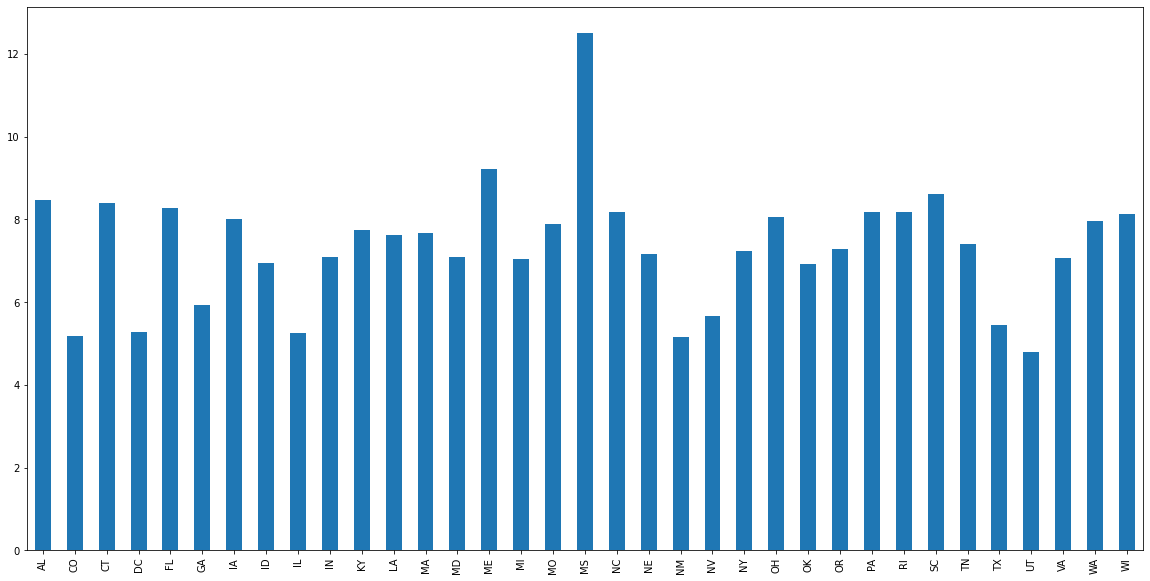

In [24]:
params = entity.params.iloc[[0]+list(range(5, len(entity.params)))]
params.iloc[1:] = params.iloc[1:] +  params.iloc[0]
params.index = ['AL'] +  list(map(lambda x: x.split(".")[1], params.index[1:]))
params.plot(kind='bar', figsize=(20, 10))

In [25]:
year_str = df.reset_index()[['Year']].astype('str')
plant_str = df.reset_index()[['plant_name']].astype('str')
pdf = df.set_index(['plant_name', 'Year'])
year_str.index = pdf.index
plant_str.index = pdf.index
pdf['year_str'] = year_str
pdf['plant_str'] = plant_str

In [26]:
# Plant FE
mod = PanelOLS(pdf['Crude Rate'], pdf[['const', 'min_dist', 'plant_str']], entity_effects=False, time_effects=False)
entity = mod.fit(cov_type='robust')
print(entity)

                          PanelOLS Estimation Summary                           
Dep. Variable:             Crude Rate   R-squared:                        0.2833
Estimator:                   PanelOLS   R-squared (Between):              1.0000
No. Observations:                3926   R-squared (Within):               0.0015
Date:                Thu, Dec 10 2020   R-squared (Overall):              0.2833
Time:                        01:04:08   Log-likelihood                   -8034.9
Cov. Estimator:                Robust                                           
                                        F-statistic:                      34.086
Entities:                          45   P-value                           0.0000
Avg Obs:                       87.244   Distribution:                 F(45,3880)
Min Obs:                       6.0000                                           
Max Obs:                       438.00   F-statistic (robust):             37.019
                            

In [27]:
# Plant FE
mod = PanelOLS(pdf['Crude Rate'], pdf[['const', 'min_dist', 'Sex', 'Asian', 'Black', 'plant_str']], entity_effects=False, time_effects=False)
entity = mod.fit(cov_type='robust')
print(entity)

                          PanelOLS Estimation Summary                           
Dep. Variable:             Crude Rate   R-squared:                        0.6260
Estimator:                   PanelOLS   R-squared (Between):              1.0000
No. Observations:                3926   R-squared (Within):               0.4790
Date:                Thu, Dec 10 2020   R-squared (Overall):              0.6260
Time:                        01:04:09   Log-likelihood                   -6758.1
Cov. Estimator:                Robust                                           
                                        F-statistic:                      135.20
Entities:                          45   P-value                           0.0000
Avg Obs:                       87.244   Distribution:                 F(48,3877)
Min Obs:                       6.0000                                           
Max Obs:                       438.00   F-statistic (robust):             170.32
                            

In [28]:
# Plant FE + Controls
mod = PanelOLS(pdf['Crude Rate'], pdf[['const', 'min_dist', 'plant_str']], entity_effects=False, time_effects=False)
entity_controls = mod.fit(cov_type='robust')
print(entity_controls)

                          PanelOLS Estimation Summary                           
Dep. Variable:             Crude Rate   R-squared:                        0.2833
Estimator:                   PanelOLS   R-squared (Between):              1.0000
No. Observations:                3926   R-squared (Within):               0.0015
Date:                Thu, Dec 10 2020   R-squared (Overall):              0.2833
Time:                        01:04:09   Log-likelihood                   -8034.9
Cov. Estimator:                Robust                                           
                                        F-statistic:                      34.086
Entities:                          45   P-value                           0.0000
Avg Obs:                       87.244   Distribution:                 F(45,3880)
Min Obs:                       6.0000                                           
Max Obs:                       438.00   F-statistic (robust):             37.019
                            

In [29]:
# Plant FE + Year FE + Controls
mod = PanelOLS(pdf['Crude Rate'], pdf[['const', 'min_dist', 'Sex', 'Black', 'Asian', 'plant_str', 'year_str']], entity_effects=False, time_effects=False)
entity = mod.fit(cov_type='robust')
print(entity)

                          PanelOLS Estimation Summary                           
Dep. Variable:             Crude Rate   R-squared:                        0.6334
Estimator:                   PanelOLS   R-squared (Between):              1.0000
No. Observations:                3926   R-squared (Within):               0.4892
Date:                Thu, Dec 10 2020   R-squared (Overall):              0.6334
Time:                        01:04:09   Log-likelihood                   -6719.2
Cov. Estimator:                Robust                                           
                                        F-statistic:                      101.00
Entities:                          45   P-value                           0.0000
Avg Obs:                       87.244   Distribution:                 F(66,3859)
Min Obs:                       6.0000                                           
Max Obs:                       438.00   F-statistic (robust):             128.63
                            

<AxesSubplot:>

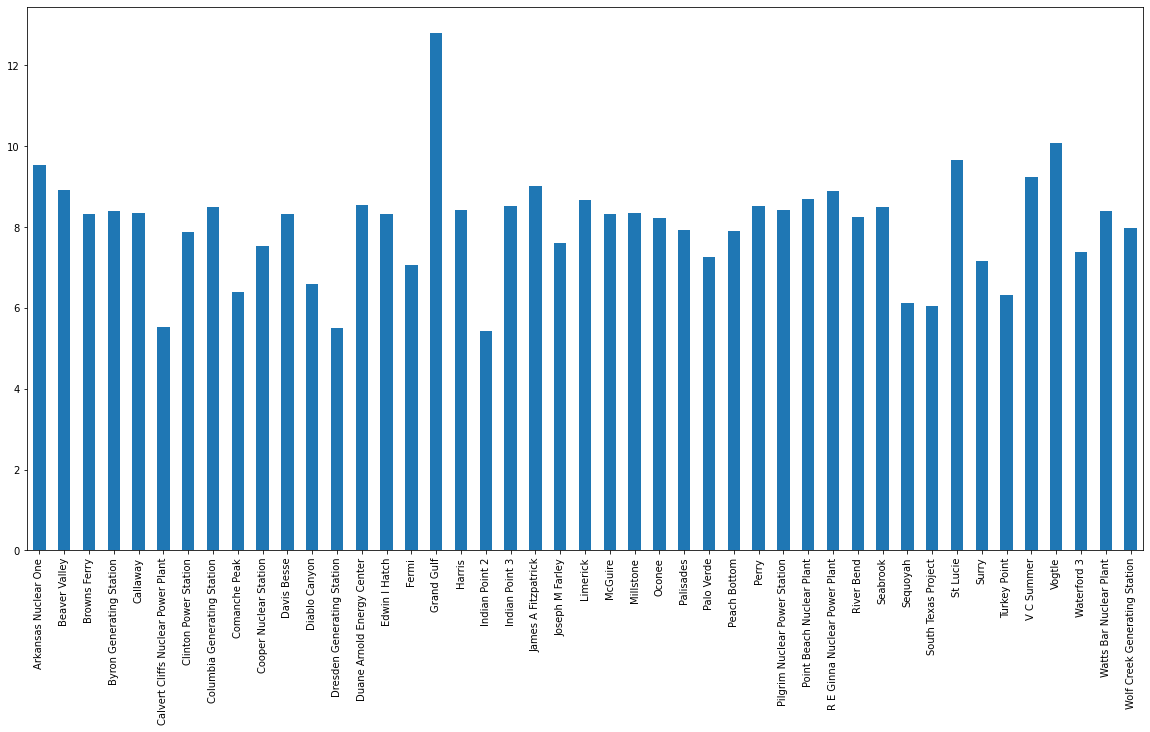

In [30]:
params = entity_controls.params.iloc[[0]+list(range(2, len(entity_controls.params)))]
params.iloc[1:] = params.iloc[1:] +  params.iloc[0]
params.index = ['Arkansas Nuclear One'] +  list(map(lambda x: x.split(".")[1], params.index[1:]))
params.plot(kind='bar', figsize=(20, 10))

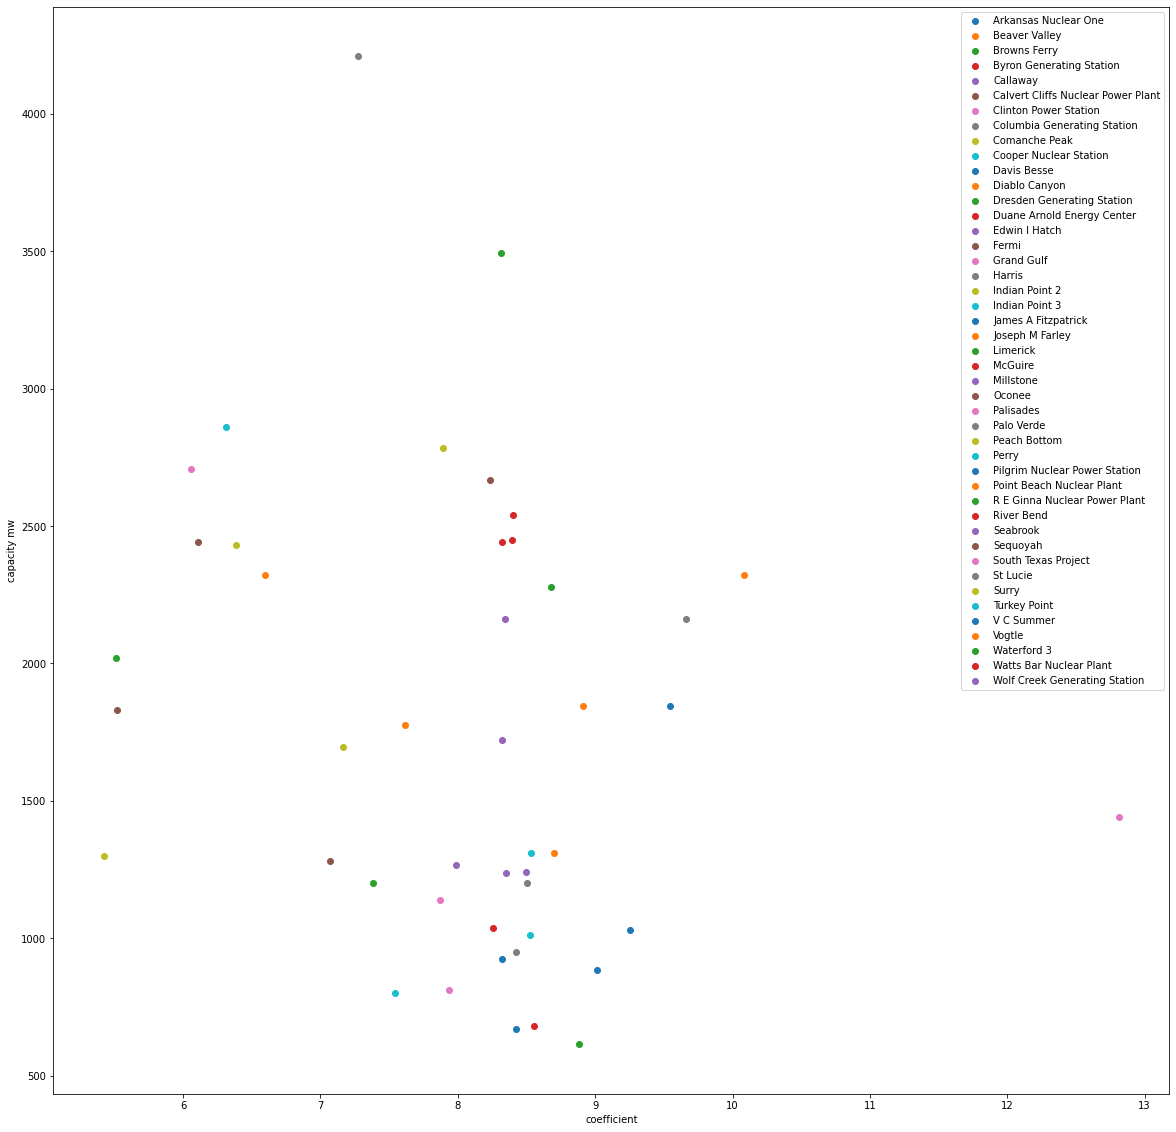

In [33]:
capacities = []
plt.figure(figsize=(20, 20))
for i in range(len(params)):
    capacities.append(pdf['capacity'][params.index[i]].iloc[0])
    plt.scatter(params.iloc[i], pdf['capacity'][params.index[i]].iloc[0])
plt.legend(params.index)
plt.xlabel('coefficient')
plt.ylabel('capacity mw')
plt.show()

In [34]:
X = sm.add_constant(params)
r = sm.OLS(capacities, X).fit(cov_type='HC1')
print(r.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     4.312
Date:                Thu, 10 Dec 2020   Prob (F-statistic):             0.0439
Time:                        01:04:58   Log-Likelihood:                -363.40
No. Observations:                  45   AIC:                             730.8
Df Residuals:                      43   BIC:                             734.4
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2857.5747    560.229      5.101      0.0